# Линейная классификация: логистическая регрессия и метрики качества

В этом задании мы будем, используя метеоданные из Австралии, отвечать на вопрос: "будет ли завтра дождь". Построив модель, оценим её качество, используя пройденные метрики качества классификации. В качестве базовой модели предлагается использовать логистическую регрессию. Чтобы вспомнить о том, что значат все эти слова, можно ознакомиться с приложенными к заданию pdf, лекциями с 5 по 8 [данного плейлиста](https://www.youtube.com/playlist?list=PLEwK9wdS5g0oZwFwoQT-BrjmkazJWXxfe) или любыми другими источниками.

Импортируем библиотеки и прочитаем датасет:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

data = 'weatherAUS.csv'

df = pd.read_csv(data)

In [ ]:
import warnings

warnings.filterwarnings('ignore')

### Знакомство с данными

In [ ]:
# preview the dataset

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Признаки:

Location - The common name of the location of the weather station

MinTemp - The minimum temperature in degrees celsius

MaxTemp - The maximum temperature in degrees celsius

Rainfall - The amount of rainfall recorded for the day in mm

Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine - The number of hours of bright sunshine in the day

WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindGust9am - Direction of the wind at 9am

WindGust3pm - Direction of the wind at 3pm

WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am - Humidity (percent) at 9am

Humidity3pm - Humidity (percent) at 3pm

Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.

Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm

Temp9am - Temperature (degrees C) at 9am

Temp3pm - Temperature (degrees C) at 3pm

RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow - будет ли дождь завтра (целевая переменная).

#### 1. [0.5 балла] Посмотрите на баланс классов целевой переменной, постройте лучшую константную модель и выведите долю правильных ответов (accuracy) этой модели:

In [ ]:
df["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

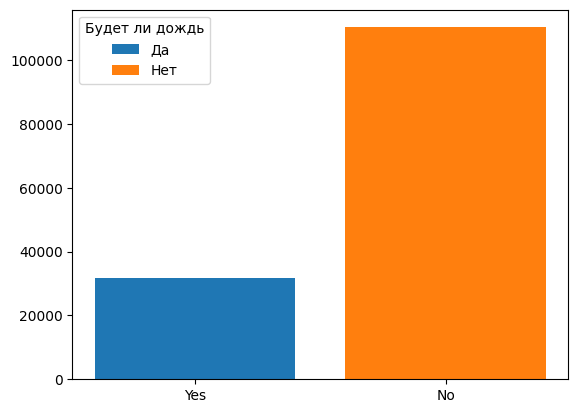

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

Columns = [
        'Yes',
        'No'
          ]
Columns_Values = [
      df["RainTomorrow"].value_counts()["Yes"],
      df["RainTomorrow"].value_counts()["No"]
                 ]
bar_labels = ['Да', 'Нет']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(Columns, Columns_Values, label=bar_labels, color=bar_colors)

ax.set_ylabel('')
ax.set_title('')
ax.legend(title='Будет ли дождь')

plt.show()

In [ ]:
AllCounts = sum(df["RainTomorrow"].value_counts())
YesClass = df["RainTomorrow"].value_counts()["Yes"]
NoClass = df["RainTomorrow"].value_counts()["No"]
PercentYes = YesClass/AllCounts *100
PercentNo = NoClass/AllCounts *100
print(f"Соотношение:\nБудет дождь - {PercentYes:2f}%\nНе будет - {PercentNo:2f}%")

Соотношение:
Будет дождь - 22.418122%
Не будет - 77.581878%


In [ ]:
from sklearn.metrics import accuracy_score

as_const = accuracy_score((df['RainTomorrow'] == 'Yes').astype(int), [0] * df['RainTomorrow'].size)
print(f"Максимальный accuracy, который можно получить константной моделью: {as_const}")

Максимальный accuracy, который можно получить константной моделью: 0.7808538429808882


In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Как мы видим, у нас в данных есть пропуски, и есть категориальные переменные, которые требуют предварительной подготовки для логистической регрессии.

#### 2. [0.5 балла] Разделите датасет на train и test в пропорции 80/20. Вспомните о важности перемешивания данных. Будем ли мы это делать сегодня? Почему?
Ответ:

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

### Категориальные признаки

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
categorical.remove('RainTomorrow') # target

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Прежде, чем преобразовывать категориальные признаки, неплохо бы понять их природу. Например, принципиально важно, сколько уникальных значений принимает каждый из них, от этого зависит способ обработки.  

#### 3. [0.5 балла]  Выведите число уникальных значений, которое принимает каждый категориальный признак.

In [ ]:
for category in categorical:
    print(f'Number of unique values for "{ category }": ', df[category].nunique())

Number of unique values for "Location":  49
Number of unique values for "WindGustDir":  16
Number of unique values for "WindDir9am":  16
Number of unique values for "WindDir3pm":  16
Number of unique values for "RainToday":  2


#### 4. [1 балл]  Подготовьте категориальные признаки к дальнейшей работе: выберите для каждого из них способы кодирования и заполнения пропусков и реализуйте.

Подсказка: One Hot Encoding подойдет для большинства признаков, но не для всех.

Подсказка: Помните, что методы, заполняющие пропуски, обучаются только на train, применяются на train и test.

### Date
Попробуем:
1. Осортировать по дате ( сделали ранее )
2. Вычленим месяц из даты
3. Используем One Hot кодирование
4. Добавим в качестве признака "был ли дождь день назад", "был ли дождь 2 дня назад", "был ли дождь 3 дня назад" ( в этой же локации ).

#### Оставляем месяц

In [ ]:
import datetime
X_train['month_of_date'] = X_train['Date'].dt.month
X_test['month_of_date'] = X_test['Date'].dt.month
X_test.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month_of_date
11473,2015-11-10,CoffsHarbour,12.2,24.3,0.0,NaN,NaN,E,26.0,SE,...,67.0,61.0,1016.5,1014.3,NaN,NaN,20.6,23.6,No,11
135477,2015-11-10,Launceston,15.1,22.1,0.0,NaN,NaN,S,39.0,SSE,...,53.0,46.0,NaN,NaN,8.0,4.0,15.5,19.5,No,11
138517,2015-11-10,AliceSprings,22.0,36.6,0.0,14.4,9.2,ESE,33.0,ENE,...,11.0,9.0,1011.1,1007.6,7.0,7.0,30.0,35.2,No,11
132437,2015-11-10,Hobart,11.5,17.7,0.0,6.6,9.9,WSW,54.0,SW,...,43.0,38.0,1018.3,1019.3,7.0,5.0,14.0,15.3,No,11
101959,2015-11-10,MountGambier,12.6,19.1,0.8,6.8,6.2,SSE,46.0,SE,...,94.0,53.0,1020.4,1020.0,8.0,7.0,13.3,17.5,No,11
111017,2015-11-10,Albany,15.0,20.4,0.0,2.6,6.0,NaN,NaN,E,...,84.0,NaN,1021.1,1016.5,8.0,NaN,18.1,NaN,No,11
95726,2015-11-10,Townsville,23.2,29.9,2.8,8.6,6.8,ENE,41.0,ENE,...,75.0,70.0,1013.2,1010.1,7.0,6.0,26.8,27.9,Yes,11
114026,2015-11-10,Witchcliffe,10.8,24.3,0.2,NaN,NaN,WSW,30.0,NE,...,65.0,61.0,1019.1,1016.9,NaN,NaN,19.7,20.9,No,11
63597,2015-11-10,Sale,15.5,18.9,0.0,NaN,NaN,W,37.0,W,...,79.0,71.0,1017.9,1020.1,8.0,8.0,16.5,16.5,No,11
117035,2015-11-10,PearceRAAF,17.6,34.3,0.0,NaN,12.8,E,57.0,ENE,...,51.0,33.0,1017.1,1013.6,NaN,6.0,24.7,31.7,No,11


In [ ]:
X_train = pd.get_dummies(X_train, columns=['month_of_date'])
X_test = pd.get_dummies(X_test, columns=['month_of_date'])



In [ ]:
X_train[:10]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,month_of_date_3,month_of_date_4,month_of_date_5,month_of_date_6,month_of_date_7,month_of_date_8,month_of_date_9,month_of_date_10,month_of_date_11,month_of_date_12
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,False,False,False,False,False,False,False,False,True,False
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,False,False,False,False,False,False,False,False,True,False
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,False,False,False,False,False,False,False,False,True,False
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,False,False,False,False,False,False,False,False,True,False
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,False,False,False,False,False,False,False,False,True,False
45592,2007-11-06,Canberra,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,...,False,False,False,False,False,False,False,False,True,False
45593,2007-11-07,Canberra,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,...,False,False,False,False,False,False,False,False,True,False
45594,2007-11-08,Canberra,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,...,False,False,False,False,False,False,False,False,True,False
45595,2007-11-09,Canberra,8.8,19.5,0.0,4.0,4.1,S,48.0,E,...,False,False,False,False,False,False,False,False,True,False
45596,2007-11-10,Canberra,8.4,22.8,16.2,5.4,7.7,E,31.0,S,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
dfs = {}

for location, group in df.groupby('Location'):
    dfs[location] = group.reset_index(drop=True)
    dfs[location].set_index('Date', inplace=True)

dfs['Adelaide'].head(5)
# Пример вывода

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,W,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes,No
2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,SW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,No,No
2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,SW,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,No,No
2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,NE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,No,No
2008-07-05,Adelaide,9.8,15.4,0.0,NaN,0.9,N,30.0,NNE,NE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,No,NaN


In [ ]:
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())

def get_last_n_date(df,curr_row,n):
    last_day = curr_row['Date'] - pd.Timedelta(days=n)
    try:
        r = dfs[curr_row['Location']].loc[last_day.strftime("%Y-%m-%d")]
        if len(r)!=0:
            return r["RainToday"]
        else:
            return "No"
    except:
        return "No"

for n in range(1,10):
    X_train[f'Rain{n}DayAgo'] = X_train.progress_apply(lambda x: get_last_n_date(dfs, x,n), axis=1)
    X_test[f'Rain{n}DayAgo'] = X_test.progress_apply(lambda x: get_last_n_date(dfs, x,n), axis=1)

0it [00:00, ?it/s]
116368it [00:04, 25952.49it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29092/29092 [00:01<00:00, 27081.85it/s]


### Location
Попробуем:
1. Получить широту, долготу и высоту над уровнем моря

In [ ]:
from typing import List
from geopy.geocoders import Nominatim
import folium
import requests
geolocator = Nominatim(user_agent="GetLoc",timeout=10)

def get_elevation(lat, lon):
    endpoint = 'https://api.open-elevation.com/api/v1/lookup'
    params = {
        'locations': f'{lat},{lon}'
    }
    response = requests.get(endpoint, params=params)
    print(endpoint, params)
    if response.status_code == 200:
        results = response.json().get('results')
        if results:
            return results[0].get('elevation')
    else:
        print(response.text)
    return None


def get_points(points: List[str]):
    located_points, points_without_location = [], []
    latitudes, longitudes, elevation = [], [], []

    for point in points:
        location = geolocator.geocode(point)
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
            elevation.append(get_elevation(location.latitude, location.longitude))
            located_points.append(point)
        else:
            points_without_location.append(point)
    return pd.DataFrame({ 'PointName': located_points, 'Latitude': latitudes, 'Longitude': longitudes, 'Elevation': elevation }), points_without_location

points, points_without_location = get_points(df['Location'].unique())
points.head(3)

https://api.open-elevation.com/api/v1/lookup {'locations': '-35.2975906,149.1012676'}
<html>
<head><title>504 Gateway Time-out</title></head>
<body>
<center><h1>504 Gateway Time-out</h1></center>
<hr><center>nginx/1.21.1</center>
</body>
</html>

https://api.open-elevation.com/api/v1/lookup {'locations': '-33.8698439,151.2082848'}
<html>
<head><title>504 Gateway Time-out</title></head>
<body>
<center><h1>504 Gateway Time-out</h1></center>
<hr><center>nginx/1.21.1</center>
</body>
</html>

https://api.open-elevation.com/api/v1/lookup {'locations': '-34.9281805,138.5999312'}
https://api.open-elevation.com/api/v1/lookup {'locations': '-42.8825088,147.3281233'}
https://api.open-elevation.com/api/v1/lookup {'locations': '-37.8142454,144.9631732'}
https://api.open-elevation.com/api/v1/lookup {'locations': '-27.4689682,153.0234991'}
https://api.open-elevation.com/api/v1/lookup {'locations': '-31.9558933,115.8605855'}
https://api.open-elevation.com/api/v1/lookup {'locations': '-12.46044,130.84

,PointName,Latitude,Longitude,Elevation
0,Canberra,-35.297591,149.101268,NaN
1,Sydney,-33.869844,151.208285,NaN
2,Adelaide,-34.928181,138.599931,61.0


In [ ]:
points

,PointName,Latitude,Longitude,Elevation
0,Canberra,-35.297591,149.101268,NaN
1,Sydney,-33.869844,151.208285,NaN
2,Adelaide,-34.928181,138.599931,61.0
3,Hobart,-42.882509,147.328123,21.0
4,Melbourne,-37.814245,144.963173,27.0
5,Brisbane,-27.468968,153.023499,28.0
6,Perth,-31.955893,115.860585,34.0
7,Darwin,-12.460440,130.841047,34.0
8,Albany,42.651167,-73.754968,45.0
9,Newcastle,54.973847,-1.613157,55.0


In [ ]:
points_without_location

['AliceSprings',
 'MountGambier',
 'MountGinini',
 'BadgerysCreek',
 'MelbourneAirport',
 'PerthAirport',
 'CoffsHarbour',
 'PearceRAAF',
 'SydneyAirport',
 'WaggaWagga',
 'NorahHead',
 'NorfolkIsland',
 'SalmonGums']

In [ ]:
new_points=pd.DataFrame({ 'PointName':['AliceSprings','MountGambier','MountGinini','BadgerysCreek','MelbourneAirport','PerthAirport','CoffsHarbour','PearceRAAF','SydneyAirport','WaggaWagga','NorahHead','NorfolkIsland','SalmonGums'], 'Latitude': [-23.42,-37.49,-35.32,-37.685,-37.40,-31.56,-30.18,-31.40,-33.56,-35.7,-33.16,-29.056,-32.98],'Longitude':[133.52,140.46,148.47,145.538,144.50,115.57,153.07,116.00,151.10,147.22,151.34,167.961,121.645],'Elevation':[545,60,1762,210,132,20,21,46,6,180,3,319,249]})
new_points.head(3)

,PointName,Latitude,Longitude,Elevation
0,AliceSprings,-23.42,133.52,545
1,MountGambier,-37.49,140.46,60
2,MountGinini,-35.32,148.47,1762


In [ ]:
all_points = pd.concat([
    points,
    new_points
])

In [ ]:
all_points

,PointName,Latitude,Longitude,Elevation
0,Canberra,-35.297591,149.101268,NaN
1,Sydney,-33.869844,151.208285,NaN
2,Adelaide,-34.928181,138.599931,61.0
3,Hobart,-42.882509,147.328123,21.0
4,Melbourne,-37.814245,144.963173,27.0
5,Brisbane,-27.468968,153.023499,28.0
6,Perth,-31.955893,115.860585,34.0
7,Darwin,-12.460440,130.841047,34.0
8,Albany,42.651167,-73.754968,45.0
9,Newcastle,54.973847,-1.613157,55.0


In [ ]:
#Если вдруг не все точки были корректно получены через API
json_df = '[{"PointName":"Canberra","Latitude":-35.2975906,"Longitude":149.1012676,"Elevation":578.0},{"PointName":"Sydney","Latitude":-33.8698439,"Longitude":151.2082848,"Elevation":19.0},{"PointName":"Adelaide","Latitude":-34.9281805,"Longitude":138.5999312,"Elevation":61.0},{"PointName":"Hobart","Latitude":-42.8825088,"Longitude":147.3281233,"Elevation":21.0},{"PointName":"Melbourne","Latitude":-37.8142454,"Longitude":144.9631732,"Elevation":27.0},{"PointName":"Brisbane","Latitude":-27.4689682,"Longitude":153.0234991,"Elevation":28.0},{"PointName":"Perth","Latitude":-31.9558933,"Longitude":115.8605855,"Elevation":34.0},{"PointName":"Darwin","Latitude":-12.46044,"Longitude":130.8410469,"Elevation":34.0},{"PointName":"Albany","Latitude":42.6511674,"Longitude":-73.754968,"Elevation":45.0},{"PointName":"Newcastle","Latitude":54.9738474,"Longitude":-1.6131572,"Elevation":55.0},{"PointName":"GoldCoast","Latitude":52.3113257,"Longitude":4.9450524,"Elevation":0.0},{"PointName":"Albury","Latitude":-36.0804766,"Longitude":146.9162795,"Elevation":164.0},{"PointName":"Cairns","Latitude":-16.9206657,"Longitude":145.7721854,"Elevation":8.0},{"PointName":"Penrith","Latitude":54.6649465,"Longitude":-2.749059586,"Elevation":138.0},{"PointName":"Ballarat","Latitude":-37.5623013,"Longitude":143.8605645,"Elevation":422.0},{"PointName":"Bendigo","Latitude":-36.7590183,"Longitude":144.2826718,"Elevation":223.0},{"PointName":"Wollongong","Latitude":-34.4243941,"Longitude":150.89385,"Elevation":31.0},{"PointName":"Townsville","Latitude":-19.2569391,"Longitude":146.8239537,"Elevation":9.0},{"PointName":"Tuggeranong","Latitude":-35.4209771,"Longitude":149.0921341,"Elevation":586.0},{"PointName":"Launceston","Latitude":-41.4340813,"Longitude":147.1373496,"Elevation":10.0},{"PointName":"Moree","Latitude":-29.4617202,"Longitude":149.8407153,"Elevation":212.0},{"PointName":"Walpole","Latitude":42.1459019,"Longitude":-71.2538759,"Elevation":46.0},{"PointName":"Williamtown","Latitude":-32.815,"Longitude":151.8427778,"Elevation":0.0},{"PointName":"Woomera","Latitude":-31.1999142,"Longitude":136.8253532,"Elevation":167.0},{"PointName":"Nuriootpa","Latitude":-34.4693354,"Longitude":138.9939006,"Elevation":275.0},{"PointName":"Cobar","Latitude":-31.4983333,"Longitude":145.8344444,"Elevation":247.0},{"PointName":"Sale","Latitude":44.980656,"Longitude":8.809348,"Elevation":84.0},{"PointName":"Richmond","Latitude":37.5385087,"Longitude":-77.43428,"Elevation":50.0},{"PointName":"Mildura","Latitude":-34.195274,"Longitude":142.1503146,"Elevation":57.0},{"PointName":"Witchcliffe","Latitude":-34.0263348,"Longitude":115.1004768,"Elevation":87.0},{"PointName":"Dartmoor","Latitude":50.5657372,"Longitude":-3.9009732372,"Elevation":408.0},{"PointName":"Watsonia","Latitude":-37.7109468,"Longitude":145.0837808,"Elevation":96.0},{"PointName":"Portland","Latitude":45.5202471,"Longitude":-122.674194,"Elevation":20.0},{"PointName":"Uluru","Latitude":-25.3455545,"Longitude":131.0369614747,"Elevation":827.0},{"PointName":"Nhil","Latitude":-35.4713087,"Longitude":141.3062355,"Elevation":88.0},{"PointName":"Katherine","Latitude":-14.4646157,"Longitude":132.2635993,"Elevation":109.0},{"PointName":"AliceSprings","Latitude":-23.42,"Longitude":133.52,"Elevation":545.0},{"PointName":"MountGambier","Latitude":-37.49,"Longitude":140.46,"Elevation":60.0},{"PointName":"MountGinini","Latitude":-35.32,"Longitude":148.47,"Elevation":1762.0},{"PointName":"BadgerysCreek","Latitude":-37.685,"Longitude":145.538,"Elevation":210.0},{"PointName":"MelbourneAirport","Latitude":-37.4,"Longitude":144.5,"Elevation":132.0},{"PointName":"PerthAirport","Latitude":-31.56,"Longitude":115.57,"Elevation":20.0},{"PointName":"CoffsHarbour","Latitude":-30.18,"Longitude":153.07,"Elevation":21.0},{"PointName":"PearceRAAF","Latitude":-31.4,"Longitude":116.0,"Elevation":46.0},{"PointName":"SydneyAirport","Latitude":-33.56,"Longitude":151.1,"Elevation":6.0},{"PointName":"WaggaWagga","Latitude":-35.7,"Longitude":147.22,"Elevation":180.0},{"PointName":"NorahHead","Latitude":-33.16,"Longitude":151.34,"Elevation":3.0},{"PointName":"NorfolkIsland","Latitude":-29.056,"Longitude":167.961,"Elevation":319.0},{"PointName":"SalmonGums","Latitude":-32.98,"Longitude":121.645,"Elevation":249.0}]'
all_points = pd.read_json(json_df, orient='records')

In [ ]:
all_points = all_points.reset_index(drop=True)
all_points.head(4)

,PointName,Latitude,Longitude,Elevation
0,Canberra,-35.297591,149.101268,578
1,Sydney,-33.869844,151.208285,19
2,Adelaide,-34.928181,138.599931,61
3,Hobart,-42.882509,147.328123,21


In [ ]:
X_train['lat'] = X_train['Location'].apply(lambda x: float(all_points[all_points['PointName'] == x]['Latitude']))
X_train['lot'] = X_train['Location'].apply(lambda x: float(all_points[all_points['PointName'] == x]['Longitude']))
X_train['elev'] = X_train['Location'].apply(lambda x: float(all_points[all_points['PointName'] == x]['Elevation']))

X_test['lat'] = X_test['Location'].apply(lambda x: float(all_points[all_points['PointName'] == x]['Latitude']))
X_test['lot'] = X_test['Location'].apply(lambda x: float(all_points[all_points['PointName'] == x]['Longitude']))
X_test['elev'] = X_test['Location'].apply(lambda x: float(all_points[all_points['PointName'] == x]['Elevation']))

In [ ]:
from typing import Tuple

wind_vectors = {
    'N': np.array([0, 1]),
    'S': np.array([0, -1]),
    'E': np.array([1, 0]),
    'W': np.array([-1, 0])
}

def norm(vec: np.array):
    n = np.sqrt( vec[0] ** 2 +  vec[1] ** 2)
    return vec / n


def encode_wind(wind_label: str):
    if len(wind_label) == 3:
        return norm(encode_wind(wind_label[0]) + encode_wind(wind_label[1:]))
    elif len(wind_label) == 2:
        return norm(encode_wind(wind_label[0]) + encode_wind(wind_label[1]))
    else:
        return wind_vectors[wind_label]


In [ ]:
def process_wind_features(df: pd.DataFrame, wind_feature: str) -> pd.DataFrame:
    if wind_feature not in df.columns:
        return df


def process_wind_features(df: pd.DataFrame, wind_feature: str) -> pd.DataFrame:
    if wind_feature not in df.columns:
        return df

    x, y = [], []
    for index, row in df.iterrows():
        if pd.isna(row[wind_feature]):
            x.append(row[wind_feature])
            y.append(row[wind_feature])
        else:
            wind_x, wind_y = encode_wind(row[wind_feature])
            x.append(wind_x)
            y.append(wind_y)

    processed_df = df
    processed_df[f"{wind_feature}_x"], processed_df[f"{wind_feature}_y"] = x, y
    processed_df[f"{wind_feature}_x"] = processed_df[f"{wind_feature}_x"].astype(dtype='float64')
    processed_df[f"{wind_feature}_y"] = processed_df[f"{wind_feature}_y"].astype(dtype='float64')
    processed_df = processed_df.drop(columns = [wind_feature])

    return processed_df

winddir_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for winddir_feature in winddir_features:
    X_train = process_wind_features(X_train, winddir_feature)
    X_test = process_wind_features(X_test, winddir_feature)

Возьмем угол от векторизованных направлений ветра

In [ ]:
from math import sqrt, acos
X_train['deg_am_pm'] = X_train.apply(lambda row: acos((row['WindDir9am_x']*row['WindDir3pm_x'] + row['WindDir9am_y']*row['WindDir3pm_y'])/(sqrt(row['WindDir9am_x']*row['WindDir9am_x'] + row['WindDir9am_y']*row['WindDir9am_y']) + sqrt(row['WindDir3pm_x']*row['WindDir3pm_x'] + row['WindDir3pm_y']*row['WindDir3pm_y']))) , axis=1)
X_train['deg_am_Gust'] = X_train.apply(lambda row: acos((row['WindDir9am_x']*row['WindGustDir_x'] + row['WindDir9am_y']*row['WindGustDir_y'])/(sqrt(row['WindDir9am_x']*row['WindDir9am_x'] + row['WindDir9am_y']*row['WindDir9am_y']) + sqrt(row['WindGustDir_x']*row['WindGustDir_x'] + row['WindGustDir_y']*row['WindGustDir_y']))) , axis=1)
X_train['deg_Gust_pm'] = X_train.apply(lambda row: acos((row['WindGustDir_x']*row['WindDir3pm_x'] + row['WindGustDir_y']*row['WindDir3pm_y'])/(sqrt(row['WindGustDir_x']*row['WindGustDir_x'] + row['WindGustDir_y']*row['WindGustDir_y']) + sqrt(row['WindDir3pm_x']*row['WindDir3pm_x'] + row['WindDir3pm_y']*row['WindDir3pm_y']))) , axis=1)

X_test['deg_am_pm'] = X_test.apply(lambda row: acos((row['WindDir9am_x']*row['WindDir3pm_x'] + row['WindDir9am_y']*row['WindDir3pm_y'])/(sqrt(row['WindDir9am_x']*row['WindDir9am_x'] + row['WindDir9am_y']*row['WindDir9am_y']) + sqrt(row['WindDir3pm_x']*row['WindDir3pm_x'] + row['WindDir3pm_y']*row['WindDir3pm_y']))) , axis=1)
X_test['deg_am_Gust'] = X_test.apply(lambda row: acos((row['WindDir9am_x']*row['WindGustDir_x'] + row['WindDir9am_y']*row['WindGustDir_y'])/(sqrt(row['WindDir9am_x']*row['WindDir9am_x'] + row['WindDir9am_y']*row['WindDir9am_y']) + sqrt(row['WindGustDir_x']*row['WindGustDir_x'] + row['WindGustDir_y']*row['WindGustDir_y']))) , axis=1)
X_test['deg_Gust_pm'] = X_test.apply(lambda row: acos((row['WindGustDir_x']*row['WindDir3pm_x'] + row['WindGustDir_y']*row['WindDir3pm_y'])/(sqrt(row['WindGustDir_x']*row['WindGustDir_x'] + row['WindGustDir_y']*row['WindGustDir_y']) + sqrt(row['WindDir3pm_x']*row['WindDir3pm_x'] + row['WindDir3pm_y']*row['WindDir3pm_y']))) , axis=1)

In [ ]:
X_train =X_train.drop(['WindDir9am_x', 'WindDir9am_y', 'WindDir3pm_x', 'WindDir3pm_y', 'WindGustDir_x', 'WindGustDir_y'], axis=1)
X_test =X_test.drop(['WindDir9am_x', 'WindDir9am_y', 'WindDir3pm_x', 'WindDir3pm_y', 'WindGustDir_x', 'WindGustDir_y'], axis=1)
X_train.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Rain6DayAgo,Rain7DayAgo,Rain8DayAgo,Rain9DayAgo,lat,lot,elev,deg_am_pm,deg_am_Gust,deg_Gust_pm
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,...,No,No,No,No,-35.297591,149.101268,578.0,1.570796,1.570796,1.047198
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,...,No,No,No,No,-35.297591,149.101268,578.0,2.094395,1.090615,2.050977
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,...,No,No,No,No,-35.297591,149.101268,578.0,1.090615,1.209429,1.378267
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,...,No,No,No,No,-35.297591,149.101268,578.0,1.090615,1.090615,1.209429
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,...,No,No,No,No,-35.297591,149.101268,578.0,1.209429,1.047198,1.209429
45592,2007-11-06,Canberra,6.2,16.9,0.0,5.8,8.2,44.0,20.0,24.0,...,No,No,No,No,-35.297591,149.101268,578.0,1.209429,1.047198,1.209429
45593,2007-11-07,Canberra,6.1,18.2,0.2,4.2,8.4,43.0,19.0,26.0,...,No,No,No,No,-35.297591,149.101268,578.0,1.090615,1.047198,1.090615
45594,2007-11-08,Canberra,8.3,17.0,0.0,5.6,4.6,41.0,11.0,24.0,...,Yes,No,No,No,-35.297591,149.101268,578.0,1.209429,1.209429,1.047198
45595,2007-11-09,Canberra,8.8,19.5,0.0,4.0,4.1,48.0,19.0,17.0,...,Yes,Yes,No,No,-35.297591,149.101268,578.0,1.090615,1.570796,1.763325
45596,2007-11-10,Canberra,8.4,22.8,16.2,5.4,7.7,31.0,7.0,6.0,...,Yes,Yes,Yes,No,-35.297591,149.101268,578.0,1.378267,1.570796,1.090615


In [ ]:
X_train['RainToday'] = X_train['RainToday'].apply(lambda x: 1 if str(x) == "Yes" else 0)
X_test['RainToday'] = X_test['RainToday'].apply(lambda x: 1 if str(x) == "Yes" else 0)

for i in range(1, 10):
    X_train[f'Rain{i}DayAgo'] = X_train[f'Rain{i}DayAgo'].apply(lambda x: 1 if str(x) == "Yes" else 0)
    X_test[f'Rain{i}DayAgo'] = X_test[f'Rain{i}DayAgo'].apply(lambda x: 1 if str(x) == "Yes" else 0)

### Числовые признаки

## Что будем делать с числовыми?
1. Lat, lot - бинаризуем
2. Проанализируем различные признаки на наличие трендов
3. Добавим значение влажности за предыдущие 10 дней в качестве признаков

In [ ]:
# find numerical variables

numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 45 numerical variables

The numerical variables are : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'month_of_date_1', 'month_of_date_2', 'month_of_date_3', 'month_of_date_4', 'month_of_date_5', 'month_of_date_6', 'month_of_date_7', 'month_of_date_8', 'month_of_date_9', 'month_of_date_10', 'month_of_date_11', 'month_of_date_12', 'Rain1DayAgo', 'Rain2DayAgo', 'Rain3DayAgo', 'Rain4DayAgo', 'Rain5DayAgo', 'Rain6DayAgo', 'Rain7DayAgo', 'Rain8DayAgo', 'Rain9DayAgo', 'lat', 'lot', 'elev', 'deg_am_pm', 'deg_am_Gust', 'deg_Gust_pm']


In [ ]:
# view the numerical variables

X_train[numerical].head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Rain6DayAgo,Rain7DayAgo,Rain8DayAgo,Rain9DayAgo,lat,lot,elev,deg_am_pm,deg_am_Gust,deg_Gust_pm
45587,2007-11-01,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,...,0,0,0,0,-35.297591,149.101268,578.0,1.570796,1.570796,1.047198
45588,2007-11-02,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,...,0,0,0,0,-35.297591,149.101268,578.0,2.094395,1.090615,2.050977
45589,2007-11-03,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,...,0,0,0,0,-35.297591,149.101268,578.0,1.090615,1.209429,1.378267
45590,2007-11-04,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,...,0,0,0,0,-35.297591,149.101268,578.0,1.090615,1.090615,1.209429
45591,2007-11-05,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,...,0,0,0,0,-35.297591,149.101268,578.0,1.209429,1.047198,1.209429


In [ ]:
# view summary statistics in numerical variables

lon_bins = pd.cut(X_train['lot'], bins=10, labels=False, right=False)
lat_bins = pd.cut(X_train['lat'], bins=10, labels=False, right=False)

# Создаем бинарные представления на основе биновых категорий
lon_dummies = pd.get_dummies(lon_bins, prefix='lon_bin')
lat_dummies = pd.get_dummies(lat_bins, prefix='lat_bin')

# Добавляем бинарные колонки к исходному DataFrame
X_train = pd.concat([X_train, lon_dummies, lat_dummies], axis=1)
lon_bins = pd.cut(X_test['lot'], bins=10, labels=False, right=False)
lat_bins = pd.cut(X_test['lat'], bins=10, labels=False, right=False)

# Создаем бинарные представления на основе биновых категорий
lon_dummies = pd.get_dummies(lon_bins, prefix='lon_bin')
lat_dummies = pd.get_dummies(lat_bins, prefix='lat_bin')

# Добавляем бинарные колонки к исходному DataFrame
X_test = pd.concat([X_test, lon_dummies, lat_dummies], axis=1)
X_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,lon_bin_1,lon_bin_4,lon_bin_8,lon_bin_9,lat_bin_0,lat_bin_1,lat_bin_2,lat_bin_3,lat_bin_8,lat_bin_9
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,...,False,False,False,True,True,False,False,False,False,False
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,...,False,False,False,True,True,False,False,False,False,False
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,...,False,False,False,True,True,False,False,False,False,False
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,...,False,False,False,True,True,False,False,False,False,False
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51468,2015-11-10,Tuggeranong,10.4,29.9,0.0,NaN,NaN,31.0,6.0,15.0,...,False,False,False,True,True,False,False,False,False,False
26573,2015-11-10,Penrith,13.1,31.3,0.0,NaN,NaN,30.0,4.0,4.0,...,False,True,False,False,False,False,False,False,False,True
69799,2015-11-10,Melbourne,NaN,NaN,NaN,9.8,0.0,37.0,22.0,28.0,...,False,False,False,True,True,False,False,False,False,False
107977,2015-11-10,Woomera,23.6,34.6,0.0,12.0,4.5,41.0,20.0,13.0,...,False,False,True,False,False,True,False,False,False,False


Некоторые (или все?) числовые признаки содержат пропуски, некоторые могут содержать выбросы.

#### Построим графики зависимостей

Сделаем отдельный ДФ с изменением влажности в отдельном городе( прим. - Канбера), проставим сделаем индексом - дату и время( 9 утра и 3 вечер) и построим график, посмотрим есть ли какая-то трендовая зависимость влажности от дождя

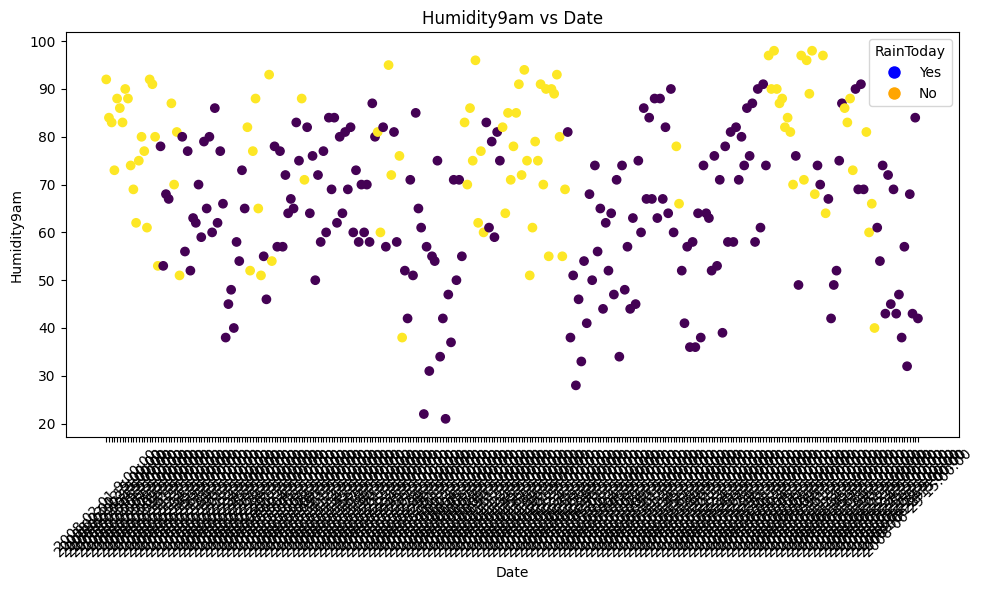

,Data,Humidity,Rain
0,2008-02-01 9:00:00,92.0,Yes
1,2008-02-01 15:00:00,84.0,Yes
2,2008-02-02 9:00:00,83.0,Yes
3,2008-02-02 15:00:00,73.0,Yes
4,2008-02-03 9:00:00,88.0,Yes
...,...,...,...
6683,2017-06-23 15:00:00,56.0,No
6684,2017-06-24 9:00:00,56.0,No
6685,2017-06-24 15:00:00,35.0,No
6686,2017-06-25 9:00:00,73.0,No


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def HumPerLocation(Location, diapazon = 100):
    Canbera_Hum = df[df['Location'] == Location]
    Canbera_Hum[['Date', 'Humidity3pm', 'Humidity9am', 'RainToday']]

    def transform_df_by_am_pm(df):
        res = {
            "Data":[],
            "Humidity": [],
            "Rain":[]
        }
        for index, row in df.iterrows():
            res['Data'].append(str(row['Date'])[:10] + " 9:00:00")
            res['Humidity'].append(row['Humidity9am'])
            res['Rain'].append(row['RainToday'])
            res['Data'].append(str(row['Date'])[:10] + " 15:00:00")
            res['Humidity'].append(row['Humidity3pm'])
            res['Rain'].append(row['RainToday'])
        return pd.DataFrame.from_dict(res)

    Canbera_Hum_Time = transform_df_by_am_pm(Canbera_Hum)
    colors = {'Yes': 'blue', 'No': 'orange'}

    df_plot = Canbera_Hum_Time[:diapazon]

    plt.figure(figsize=(10, 6))
    plt.scatter(df_plot['Data'], df_plot['Humidity'], c=pd.Categorical(df_plot['Rain']).codes)

    plt.title('Humidity vs Date')
    plt.xlabel('Date')
    plt.ylabel('Humidity')
    plt.xticks(rotation=45)

    handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=value) for key, value in colors.items()]
    plt.legend(title='RainToday', handles=handles)

    plt.tight_layout()
    plt.show()
    return Canbera_Hum_Time


HumPerLocation("Sydney", 300)

Визуально можно заметить некоторую зависимость между повышением влажности и "дождливостью" в этот день
Тогда добавим экспоненциальное скользящее среднее за 10 дней в качестве признака

In [ ]:
dfs = {}
df['mean_hum'] = df.apply(lambda x: (x["Humidity9am"]+ x["Humidity3pm"])/2, axis=1)
for location, group in df.groupby('Location'):
    dfs[location] = group.reset_index(drop=True)
    dfs[location].set_index('Date', inplace=True)


In [ ]:
means = {}
for i in dfs:
    means[i] = dfs[i]['mean_hum'].mean()

In [ ]:
dfs = {}
df['mean_hum'] = df.apply(lambda x: (x["Humidity9am"]+ x["Humidity3pm"])/2, axis=1)
for location, group in df.groupby('Location'):
    dfs[location] = group.reset_index(drop=True)
    dfs[location].set_index('Date', inplace=True)


def get_last_n_date(df,curr_row,n):
    last_day = curr_row['Date'] - pd.Timedelta(days=n)
    try:
        r = dfs[curr_row['Location']].loc[last_day.strftime("%Y-%m-%d")]
        if len(r)!=0:
            return r["mean_hum"]
        else:
            return means[curr_row['Location']]
    except:
        return means[curr_row['Location']]


for n in range(1,11):
    X_train[f'Hum{n}DayAgo'] = X_train.progress_apply(lambda x: get_last_n_date(dfs, x, n), axis=1)
    X_test[f'Hum{n}DayAgo'] = X_test.progress_apply(lambda x: get_last_n_date(dfs, x, n), axis=1)
X_train

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29092/29092 [00:01<00:00, 26538.60it/s]


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Hum1DayAgo,Hum2DayAgo,Hum3DayAgo,Hum4DayAgo,Hum5DayAgo,Hum6DayAgo,Hum7DayAgo,Hum8DayAgo,Hum9DayAgo,Hum10DayAgo
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,...,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,...,48.500000,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,...,58.000000,48.500000,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,...,75.500000,58.000000,48.500000,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,...,59.000000,75.500000,58.000000,48.500000,59.570898,59.570898,59.570898,59.570898,59.570898,59.570898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51468,2015-11-10,Tuggeranong,10.4,29.9,0.0,NaN,NaN,31.0,6.0,15.0,...,56.000000,50.500000,59.000000,68.500000,98.000000,79.000000,70.500000,65.500000,73.000000,54.000000
26573,2015-11-10,Penrith,13.1,31.3,0.0,NaN,NaN,30.0,4.0,4.0,...,50.000000,61.500000,69.500000,72.500000,90.000000,98.000000,98.000000,57.000000,55.500000,61.000000
69799,2015-11-10,Melbourne,NaN,NaN,NaN,9.8,0.0,37.0,22.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107977,2015-11-10,Woomera,23.6,34.6,0.0,12.0,4.5,41.0,20.0,13.0,...,17.000000,16.000000,34.500000,50.500000,65.000000,71.000000,64.500000,83.500000,27.000000,39.500000


In [ ]:
X_test['RainToday'].value_counts()

RainToday
0    22746
1     6346
Name: count, dtype: int64

#### 5. [0.5 балла]  Посмотрите на вывод метода describe. Какие признаки скорее всего содержат выбросы? Удалите эти признаки.

Подсказка: предлагается найти до 4х таких столбцов.

Подсказка: попробуйте построить гистограммы, вспомните, что такое boxplot и как он строится

In [ ]:
boxplot = pd.concat([X_train, y_train], axis=1).boxplot(by='RainTomorrow', figsize=(100, 100))

In [ ]:
X_train = X_train.drop(['Rainfall', 'Evaporation'], axis=1)
X_test = X_test.drop(['Rainfall', 'Evaporation'], axis=1)

#### 6. [0.5 балла]  Заполните пропуски в числовых признаках.

In [ ]:
numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

In [ ]:
for col in numerical:
    # Заполняем данные одной и той же констанотой с обучения
    X_train[col] = X_train[col].fillna(np.mean(X_train[col]))
    X_test[col] = X_test[col].fillna(np.mean(X_test[col]))

### (×_×)
for x, col in zip(X_train.isnull().sum(), X_train.columns):
    print(col, x)

Date 0
Location 0
MinTemp 0
MaxTemp 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
RainToday 0
month_of_date_1 0
month_of_date_2 0
month_of_date_3 0
month_of_date_4 0
month_of_date_5 0
month_of_date_6 0
month_of_date_7 0
month_of_date_8 0
month_of_date_9 0
month_of_date_10 0
month_of_date_11 0
month_of_date_12 0
Rain1DayAgo 0
Rain2DayAgo 0
Rain3DayAgo 0
Rain4DayAgo 0
Rain5DayAgo 0
Rain6DayAgo 0
Rain7DayAgo 0
Rain8DayAgo 0
Rain9DayAgo 0
lat 0
lot 0
elev 0
deg_am_pm 0
deg_am_Gust 0
deg_Gust_pm 0
lon_bin_0 0
lon_bin_1 0
lon_bin_4 0
lon_bin_8 0
lon_bin_9 0
lat_bin_0 0
lat_bin_1 0
lat_bin_2 0
lat_bin_3 0
lat_bin_8 0
lat_bin_9 0
Hum1DayAgo 0
Hum2DayAgo 0
Hum3DayAgo 0
Hum4DayAgo 0
Hum5DayAgo 0
Hum6DayAgo 0
Hum7DayAgo 0
Hum8DayAgo 0
Hum9DayAgo 0
Hum10DayAgo 0


#### 7. [0.5 балла] Сделайте нормализацию данных перед обучением.

In [ ]:
X_train = X_train.drop(['Date', 'Location', 'lat', 'lot'], axis=1)
X_test = X_test.drop(['Date', 'Location', 'lat', 'lot'], axis=1)

In [ ]:
y_train.fillna("No", inplace=True)
y_test.fillna("No", inplace=True)
y_test = y_test.apply(lambda x: 1 if str(x) == "Yes" else 0)
y_train = y_train.apply(lambda x: 1 if str(x) == "Yes" else 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaller = MinMaxScaler()
scaled_features = scaller.fit_transform(X_train)
X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

scaled_features = scaller.transform(X_test)
X_test = pd.DataFrame(scaled_features, index=X_test.index, columns=X_test.columns)

#### 8. [0.5 балла] Обучите логистическую регрессию на полученном датасете.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', solver="saga")
log_reg.fit(X_train, y_train)
log_reg.coef_

array([[ 0.16658178, -1.9902558 , -1.51891635,  5.89802692, -0.51264919,
        -1.09417788,  1.05240756,  5.71210486,  5.25583424, -9.31778956,
        -0.0421145 ,  1.26989765,  1.12007069,  2.31165577,  0.61409258,
        -0.49035148, -0.23461289, -0.13962497,  0.07148159,  0.18250669,
         0.16754938,  0.31482804,  0.25713273,  0.06273925,  0.05086741,
        -0.01120891, -0.31408464,  0.10440754,  0.12175111,  0.08467235,
         0.01035931,  0.08501502,  0.13602483,  0.11253669,  0.08982071,
         0.08641763, -0.29865964, -0.18289971,  0.49834212,  0.32292812,
        -0.02848156,  0.24218789, -0.04845728,  0.03081561, -0.27884245,
         0.36501404,  0.31144012, -0.30672675, -0.61775425, -0.067336  ,
         0.23258505, -0.93631448, -0.20231499, -0.06220744, -0.16059649,
        -0.05581534, -0.16779952, -0.10114981, -0.1279132 , -0.0189356 ,
         0.16174134]])

#### 9. [0.5 балла] Посчитайте accuracy, precision и recall на обучающей и тестовой выборке.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

accuracy = accuracy_score(y_test, log_reg.predict(X_test))
print(f"Accuracy Score:", accuracy)
recall = recall_score(y_test, log_reg.predict(X_test))
print(f"Recall:", recall)
presicion = precision_score(y_test, log_reg.predict(X_test))
print(f"Presicion:", presicion)

Accuracy Score: 0.8424652825519043
Recall: 0.4570527974783294
Presicion: 0.7181773155027241


#### 10. [1 балл] Попробуйте обучить несколько классификаторов, изменяя параметр регуляризации C. Сравните метрики. О чем говорят результаты?

Ответ:

In [ ]:
C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
results = []
for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'C': C,
        'ROC-AUC': roc_auc,
        'Accuracy': accuracy
    })
results_df = pd.DataFrame(results)
print(results_df)

         C   ROC-AUC  Accuracy
0    0.001  0.820298  0.816410
1    0.010  0.847296  0.837997
2    0.100  0.854671  0.841572
3    1.000  0.856538  0.842225
4   10.000  0.856725  0.843222
5  100.000  0.856526  0.842706


Логистическая регрессия предсказывает не просто классы, а их вероятности, поэтому полезно посчитать метрику, не зависящую от выбора порога для классификации:

#### 11. [0.5 балл] Выберите лучшую из получившихся моделей, посчитайте AUC-ROC.

#### 12. [1 балл] Если AUC-ROC > 0.85. Можете продолжать улучшать модель, если это необходимо.

In [ ]:
from sklearn.metrics import roc_auc_score

model = LogisticRegression(C=100, penalty="l2", solver="newton-cg")
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc:.2f}")

ROC-AUC score: 0.86


Одним из преимуществ линейных моделей является то, что после обучения можно оценить вклад каждого признака.

#### 13. [0.5 балл] Какие признаки получились самыми важными? Напишите топ-3:
Ответ: Расположение, Humidity3pm, WindGustSpeed

In [ ]:
values_per = []
for i in range(len(X_train.describe().columns)):
    values_per.append([X_train.columns[i], log_reg.coef_[0][i] / X_train.describe()[X_train.columns[i]]['mean']])
values_per.sort(key=lambda x: abs(x[1]))
values_per

[['Hum9DayAgo', np.float64(-0.03145271278780713)],
 ['Rain4DayAgo', np.float64(0.047600888367243584)],
 ['Cloud9am', np.float64(-0.08733573149009831)],
 ['Hum5DayAgo', np.float64(-0.09273552845503559)],
 ['Hum3DayAgo', np.float64(-0.1033323496767659)],
 ['month_of_date_11', np.float64(-0.14204060870077473)],
 ['lon_bin_8', np.float64(0.14769157143113185)],
 ['Hum7DayAgo', np.float64(-0.16803078010097744)],
 ['Hum8DayAgo', np.float64(-0.21247407063939544)],
 ['Hum4DayAgo', np.float64(-0.26680008686571677)],
 ['Hum10DayAgo', np.float64(0.26864989780652243)],
 ['Hum6DayAgo', np.float64(-0.2787883149011739)],
 ['Hum2DayAgo', np.float64(-0.3360668877719902)],
 ['MinTemp', np.float64(0.34542443183451255)],
 ['Rain3DayAgo', np.float64(0.38811803617783486)],
 ['Rain5DayAgo', np.float64(0.3914774952446097)],
 ['Rain9DayAgo', np.float64(0.40032827810837873)],
 ['Rain8DayAgo', np.float64(0.41544799562854356)],
 ['lon_bin_9', np.float64(-0.46202959197464294)],
 ['lon_bin_4', np.float64(-0.46341854